In [6]:
import pandas as pd
import numpy as np
import scipy
from scipy import interpolate
import geopandas as gpd
import csv

In [7]:
# create a variable to hold the excel file name
storm_df = pd.read_csv('../power_outages_medically_vulnerable_populations/data/Storm_Surge.csv')

# prints the DataFrame to the screen
storm_df

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
0,Autauga,AL,1001,modeled,4,25070,0.02,05/09/2024 08:00 AM UTC,False
1,Autauga,AL,1001,modeled,4,25070,0.02,05/09/2024 08:15 AM UTC,False
2,Autauga,AL,1001,modeled,1,25070,0,05/09/2024 08:45 AM UTC,False
3,Autauga,AL,1001,modeled,18,25070,0.07,05/09/2024 09:00 AM UTC,False
4,Autauga,AL,1001,modeled,18,25070,0.07,05/09/2024 09:15 AM UTC,False
...,...,...,...,...,...,...,...,...,...
919295,St. Thomas,VI,78030,modeled,3,22725,0.01,05/20/2024 06:45 AM UTC,False
919296,St. Thomas,VI,78030,modeled,3,22725,0.01,05/20/2024 07:00 AM UTC,False
919297,St. Thomas,VI,78030,modeled,3,22725,0.01,05/20/2024 07:15 AM UTC,False
919298,St. Thomas,VI,78030,modeled,3,22725,0.01,05/20/2024 07:30 AM UTC,False


In [8]:
storm_df = storm_df.loc[(storm_df["Percent Out"] != 'Not Available')]

storm_df

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
0,Autauga,AL,1001,modeled,4,25070,0.02,05/09/2024 08:00 AM UTC,False
1,Autauga,AL,1001,modeled,4,25070,0.02,05/09/2024 08:15 AM UTC,False
2,Autauga,AL,1001,modeled,1,25070,0,05/09/2024 08:45 AM UTC,False
3,Autauga,AL,1001,modeled,18,25070,0.07,05/09/2024 09:00 AM UTC,False
4,Autauga,AL,1001,modeled,18,25070,0.07,05/09/2024 09:15 AM UTC,False
...,...,...,...,...,...,...,...,...,...
919295,St. Thomas,VI,78030,modeled,3,22725,0.01,05/20/2024 06:45 AM UTC,False
919296,St. Thomas,VI,78030,modeled,3,22725,0.01,05/20/2024 07:00 AM UTC,False
919297,St. Thomas,VI,78030,modeled,3,22725,0.01,05/20/2024 07:15 AM UTC,False
919298,St. Thomas,VI,78030,modeled,3,22725,0.01,05/20/2024 07:30 AM UTC,False


In [9]:
# Select Florida counties only
df_FL= storm_df.loc[(storm_df["State"]== 'FL')]

# prints the DataFrame to the screen
df_FL

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
100948,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:00 AM UTC,False
100949,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:15 AM UTC,False
100950,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:30 AM UTC,False
100951,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:45 AM UTC,False
100952,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 09:00 AM UTC,False
...,...,...,...,...,...,...,...,...,...
143413,Washington,FL,12133,modeled,1,17212,0.01,05/18/2024 11:15 PM UTC,False
143414,Washington,FL,12133,modeled,2,17212,0.01,05/18/2024 11:30 PM UTC,False
143415,Washington,FL,12133,modeled,1,17212,0.01,05/18/2024 11:45 PM UTC,False
143416,Washington,FL,12133,modeled,1,17212,0.01,05/19/2024 12:00 AM UTC,False


In [5]:
# Select Alabama counties only
df_AL= storm_df.loc[(storm_df["State"]== 'AL')]

# prints the DataFrame to the screen
df_AL

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
0,Autauga,AL,1001,modeled,4,25070,0.02,05/09/2024 08:00 AM UTC,False
1,Autauga,AL,1001,modeled,4,25070,0.02,05/09/2024 08:15 AM UTC,False
2,Autauga,AL,1001,modeled,1,25070,0,05/09/2024 08:45 AM UTC,False
3,Autauga,AL,1001,modeled,18,25070,0.07,05/09/2024 09:00 AM UTC,False
4,Autauga,AL,1001,modeled,18,25070,0.07,05/09/2024 09:15 AM UTC,False
...,...,...,...,...,...,...,...,...,...
27537,Winston,AL,1133,modeled,1,12840,0.01,05/20/2024 12:00 AM UTC,False
27538,Winston,AL,1133,modeled,1,12840,0.01,05/20/2024 12:15 AM UTC,False
27539,Winston,AL,1133,modeled,1,12840,0.01,05/20/2024 12:30 AM UTC,False
27540,Winston,AL,1133,modeled,1,12840,0.01,05/20/2024 12:45 AM UTC,False


In [6]:
# Select Georgia counties only
df_GA= storm_df.loc[(storm_df["State"]== 'GA')]

# prints the DataFrame to the screen
df_GA

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
143418,Appling,GA,13001,modeled,1,10141,0.01,05/09/2024 12:30 PM UTC,False
143419,Appling,GA,13001,modeled,1,10141,0.01,05/09/2024 12:45 PM UTC,False
143420,Appling,GA,13001,modeled,1,10141,0.01,05/09/2024 01:00 PM UTC,False
143421,Appling,GA,13001,modeled,1,10141,0.01,05/09/2024 01:15 PM UTC,False
143422,Appling,GA,13001,modeled,1,10141,0.01,05/09/2024 01:30 PM UTC,False
...,...,...,...,...,...,...,...,...,...
191485,Worth,GA,13321,modeled,1,5922,0.02,05/19/2024 09:00 PM UTC,False
191486,Worth,GA,13321,modeled,2,5922,0.03,05/19/2024 09:15 PM UTC,False
191487,Worth,GA,13321,modeled,2,5922,0.03,05/19/2024 09:30 PM UTC,False
191488,Worth,GA,13321,modeled,2,5922,0.03,05/19/2024 09:45 PM UTC,False


In [10]:
# Selecting specfic counties from the Storm's path in the Florida area (Leon)

df_Leon= df_FL.loc[(df_FL["County"]== 'Leon')]

df_Leon

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
121014,Leon,FL,12073,modeled,4,198626,0,05/09/2024 08:00 AM UTC,False
121015,Leon,FL,12073,modeled,4,198626,0,05/09/2024 08:15 AM UTC,False
121016,Leon,FL,12073,modeled,4,198626,0,05/09/2024 08:30 AM UTC,False
121017,Leon,FL,12073,modeled,4,198626,0,05/09/2024 08:45 AM UTC,False
121018,Leon,FL,12073,modeled,4,198626,0,05/09/2024 09:00 AM UTC,False
...,...,...,...,...,...,...,...,...,...
122014,Leon,FL,12073,modeled,1,198626,0,05/20/2024 03:15 AM UTC,False
122015,Leon,FL,12073,modeled,1,198626,0,05/20/2024 03:30 AM UTC,False
122016,Leon,FL,12073,modeled,1,198626,0,05/20/2024 03:45 AM UTC,False
122017,Leon,FL,12073,modeled,1,198626,0,05/20/2024 04:00 AM UTC,False


In [27]:
df_Leon_1 = df_Leon.loc[(df_Leon["Percent Out"] >= '10')]

df_Leon_1

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
121096,Leon,FL,12073,modeled,68164,198626,34.32,05/10/2024 11:15 AM UTC,False
121097,Leon,FL,12073,modeled,72944,198626,36.72,05/10/2024 11:30 AM UTC,False
121098,Leon,FL,12073,modeled,73915,198626,37.21,05/10/2024 11:45 AM UTC,False
121099,Leon,FL,12073,modeled,74981,198626,37.75,05/10/2024 12:00 PM UTC,False
121100,Leon,FL,12073,modeled,75801,198626,38.16,05/10/2024 12:15 PM UTC,False
...,...,...,...,...,...,...,...,...,...
121855,Leon,FL,12073,modeled,7341,198626,3.7,05/18/2024 09:00 AM UTC,False
121856,Leon,FL,12073,modeled,7421,198626,3.74,05/18/2024 09:15 AM UTC,False
121857,Leon,FL,12073,modeled,5438,198626,2.74,05/18/2024 09:30 AM UTC,False
121902,Leon,FL,12073,modeled,5154,198626,2.59,05/18/2024 08:45 PM UTC,False


In [8]:
# Selecting specfic counties from the Storm's path in the Florida area (Gadsden)

df_Gadsden= df_FL.loc[(df_FL["County"]== 'Gadsden')]

df_Gadsden

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
111752,Gadsden,FL,12039,modeled,1,30169,0,05/09/2024 10:15 AM UTC,False
111753,Gadsden,FL,12039,modeled,1,30169,0,05/09/2024 10:30 AM UTC,False
111754,Gadsden,FL,12039,modeled,1,30169,0,05/09/2024 10:45 AM UTC,False
111755,Gadsden,FL,12039,modeled,1,30169,0,05/09/2024 11:00 AM UTC,False
111765,Gadsden,FL,12039,modeled,2,30169,0.01,05/09/2024 01:30 PM UTC,False
...,...,...,...,...,...,...,...,...,...
112489,Gadsden,FL,12039,modeled,1,30169,0,05/19/2024 11:00 PM UTC,False
112490,Gadsden,FL,12039,modeled,1,30169,0,05/19/2024 11:15 PM UTC,False
112491,Gadsden,FL,12039,modeled,1,30169,0,05/19/2024 11:30 PM UTC,False
112492,Gadsden,FL,12039,modeled,1,30169,0,05/19/2024 11:45 PM UTC,False


In [9]:
# Selecting specfic counties from the Storm's path in the Florida area (Madison)

df_Madison= df_FL.loc[(df_FL["County"]== 'Madison')]

df_Madison

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
122811,Madison,FL,12079,modeled,12,9624,0.12,05/09/2024 05:45 PM UTC,False
122812,Madison,FL,12079,modeled,1,9624,0.01,05/09/2024 08:15 PM UTC,False
122813,Madison,FL,12079,modeled,1,9624,0.01,05/09/2024 08:30 PM UTC,False
122814,Madison,FL,12079,modeled,52,9624,0.54,05/09/2024 09:15 PM UTC,False
122815,Madison,FL,12079,modeled,53,9624,0.55,05/09/2024 09:30 PM UTC,False
...,...,...,...,...,...,...,...,...,...
123250,Madison,FL,12079,modeled,8,9624,0.08,05/19/2024 12:30 PM UTC,False
123251,Madison,FL,12079,modeled,1,9624,0.01,05/19/2024 11:30 PM UTC,False
123252,Madison,FL,12079,modeled,1,9624,0.01,05/19/2024 11:45 PM UTC,False
123253,Madison,FL,12079,modeled,1,9624,0.01,05/20/2024 12:00 AM UTC,False


In [10]:
# Selecting specfic counties from the Storm's path in the Florida area (Jefferson)

df_Jefferson= df_FL.loc[(df_FL["County"]== 'Jefferson')]

df_Jefferson

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
118136,Jefferson,FL,12065,modeled,77,7443,1.03,05/09/2024 05:45 PM UTC,False
118137,Jefferson,FL,12065,modeled,1,7443,0.01,05/09/2024 06:30 PM UTC,False
118138,Jefferson,FL,12065,modeled,1,7443,0.01,05/09/2024 06:45 PM UTC,False
118139,Jefferson,FL,12065,modeled,11,7443,0.15,05/09/2024 07:00 PM UTC,False
118140,Jefferson,FL,12065,modeled,11,7443,0.15,05/09/2024 07:15 PM UTC,False
...,...,...,...,...,...,...,...,...,...
118688,Jefferson,FL,12065,modeled,3,7443,0.04,05/19/2024 11:15 PM UTC,False
118689,Jefferson,FL,12065,modeled,3,7443,0.04,05/19/2024 11:30 PM UTC,False
118690,Jefferson,FL,12065,modeled,3,7443,0.04,05/19/2024 11:45 PM UTC,False
118691,Jefferson,FL,12065,modeled,3,7443,0.04,05/20/2024 12:00 AM UTC,False


In [11]:
# Selecting specfic counties from the Storm's path in the Florida area (Taylor)

df_Taylor= df_FL.loc[(df_FL["County"]== 'Taylor')]

df_Taylor

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
139957,Taylor,FL,12123,modeled,41,12322,0.33,05/09/2024 01:45 PM UTC,False
139958,Taylor,FL,12123,modeled,41,12322,0.33,05/09/2024 02:00 PM UTC,False
139959,Taylor,FL,12123,modeled,1,12322,0.01,05/09/2024 03:00 PM UTC,False
139960,Taylor,FL,12123,modeled,1,12322,0.01,05/09/2024 03:15 PM UTC,False
139961,Taylor,FL,12123,modeled,1,12322,0.01,05/09/2024 03:30 PM UTC,False
...,...,...,...,...,...,...,...,...,...
140328,Taylor,FL,12123,modeled,1,12322,0.01,05/20/2024 02:15 AM UTC,False
140329,Taylor,FL,12123,modeled,1,12322,0.01,05/20/2024 02:30 AM UTC,False
140330,Taylor,FL,12123,modeled,1,12322,0.01,05/20/2024 02:45 AM UTC,False
140331,Taylor,FL,12123,modeled,1,12322,0.01,05/20/2024 03:00 AM UTC,False


In [12]:
# Selecting specfic counties from the Storm's path in the Florida area (Walton)

df_Walton= df_FL.loc[(df_FL["County"]== 'Walton')]

df_Walton

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
142125,Walton,FL,12131,modeled,1,71263,0,05/09/2024 10:00 AM UTC,False
142126,Walton,FL,12131,modeled,1,71263,0,05/09/2024 10:15 AM UTC,False
142127,Walton,FL,12131,modeled,1,71263,0,05/09/2024 10:30 AM UTC,False
142128,Walton,FL,12131,modeled,1,71263,0,05/09/2024 10:45 AM UTC,False
142129,Walton,FL,12131,modeled,1,71263,0,05/09/2024 11:00 AM UTC,False
...,...,...,...,...,...,...,...,...,...
142852,Walton,FL,12131,modeled,5,71263,0.01,05/20/2024 06:15 AM UTC,False
142853,Walton,FL,12131,modeled,5,71263,0.01,05/20/2024 06:30 AM UTC,False
142854,Walton,FL,12131,modeled,5,71263,0.01,05/20/2024 06:45 AM UTC,False
142855,Walton,FL,12131,modeled,5,71263,0.01,05/20/2024 07:00 AM UTC,False


In [13]:
# Selecting specfic counties from the Storm's path in the Alabama area (Houston)

df_Houston= df_AL.loc[(df_AL["County"]== 'Houston')]

df_Houston

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
13153,Houston,AL,1069,modeled,1,42273,0,05/09/2024 02:15 PM UTC,False
13154,Houston,AL,1069,modeled,1,42273,0,05/09/2024 02:30 PM UTC,False
13155,Houston,AL,1069,modeled,1,42273,0,05/09/2024 02:45 PM UTC,False
13156,Houston,AL,1069,modeled,1,42273,0,05/09/2024 03:00 PM UTC,False
13157,Houston,AL,1069,modeled,1,42273,0,05/09/2024 03:15 PM UTC,False
...,...,...,...,...,...,...,...,...,...
13690,Houston,AL,1069,modeled,1,42273,0,05/20/2024 06:45 AM UTC,False
13691,Houston,AL,1069,modeled,1,42273,0,05/20/2024 07:00 AM UTC,False
13692,Houston,AL,1069,modeled,1,42273,0,05/20/2024 07:15 AM UTC,False
13693,Houston,AL,1069,modeled,1,42273,0,05/20/2024 07:30 AM UTC,False


In [126]:
# Selecting specfic counties from the Storm's path in the Florida area (Leon)

df_Alachua= df_FL.loc[(df_FL["County"]== 'Alachua')]

df_Alachua

,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data
100948,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:00 AM UTC,False
100949,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:15 AM UTC,False
100950,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:30 AM UTC,False
100951,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:45 AM UTC,False
100952,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 09:00 AM UTC,False
...,...,...,...,...,...,...,...,...,...
101603,Alachua,FL,12001,modeled,3,217969,0,05/20/2024 06:15 AM UTC,False
101604,Alachua,FL,12001,modeled,3,217969,0,05/20/2024 06:30 AM UTC,False
101605,Alachua,FL,12001,modeled,2,217969,0,05/20/2024 07:15 AM UTC,False
101606,Alachua,FL,12001,modeled,2,217969,0,05/20/2024 07:30 AM UTC,False


In [127]:
df_Alachua['time'] = df_Alachua['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)

df_Alachua

/var/folders/6j/v_2lhj5d2bs58zpz0n5k72t40000gp/T/ipykernel_6835/3972754682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Alachua['time'] = df_Alachua['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)


,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data,time
100948,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:00 AM UTC,False,1715241600000000000
100949,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:15 AM UTC,False,1715242500000000000
100950,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:30 AM UTC,False,1715243400000000000
100951,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 08:45 AM UTC,False,1715244300000000000
100952,Alachua,FL,12001,modeled,2,217969,0,05/09/2024 09:00 AM UTC,False,1715245200000000000
...,...,...,...,...,...,...,...,...,...,...
101603,Alachua,FL,12001,modeled,3,217969,0,05/20/2024 06:15 AM UTC,False,1716185700000000000
101604,Alachua,FL,12001,modeled,3,217969,0,05/20/2024 06:30 AM UTC,False,1716186600000000000
101605,Alachua,FL,12001,modeled,2,217969,0,05/20/2024 07:15 AM UTC,False,1716189300000000000
101606,Alachua,FL,12001,modeled,2,217969,0,05/20/2024 07:30 AM UTC,False,1716190200000000000


In [128]:
import numpy as np
Time_Alachua_array = df_Alachua['time'].to_numpy()
Percent_Out_Alachua_array = df_Alachua['Percent Out'].to_numpy()

In [129]:
f_Alachua_time_interpolate = interpolate.interp1d(Time_Alachua_array, Time_Alachua_array)
f_Alachua_time_Percent_Out_interpolate = interpolate.interp1d(Time_Alachua_array, Percent_Out_Alachua_array)

In [130]:
new_A=np.arange( 1715241600000000000, 1716191100000000000, 900000000000)
len(new_A)

1055

In [131]:
xnewpt19 = pd.to_datetime(new_A)
xnewAlachua = f_Alachua_time_interpolate(new_A)
ynewAlachua = f_Alachua_time_Percent_Out_interpolate(new_A)

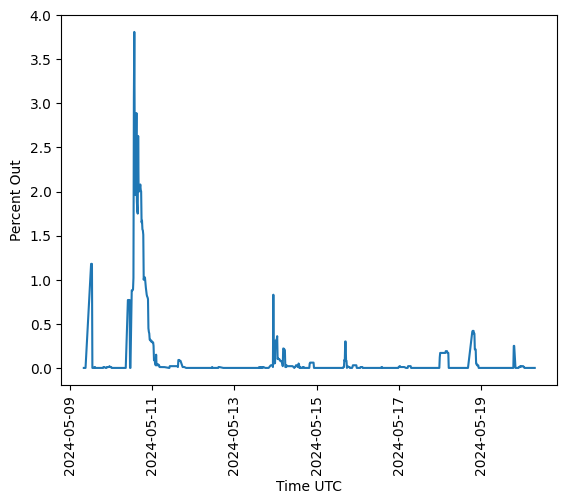

In [132]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

plt.xticks(rotation=90);
plt.plot(xnewpt19, ynewAlachua, '-')

# Adding labels
plt.xlabel('Time UTC')
plt.ylabel('Percent Out')

# Display the plot
plt.show()

In [3]:
# Leon County
# use the to_datetime function and the apply function to covert the date and time into a single representative integer
df_Leon['time'] = df_Leon['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)

df_Leon

NameError: name 'df_Leon' is not defined

In [15]:
pd.to_datetime(1715241600000000000)

Timestamp('2024-05-09 08:00:00')

In [16]:
# Step 1.: Convert all the pandas dataframes for time and sum of outages to numpy arrays. 
# time_Taylor_array is the timestamp array for Taylor County
# sum_Taylor_array is the sum of customers without power for that timestamp for Taylor County

import numpy as np
Time_Leon_array = df_Leon['time'].to_numpy()
Percent_Out_Leon_array = df_Leon['Percent Out'].to_numpy()

In [17]:
# Step 2: make a group of functions that follow the changes in time and number of outages between each data point in each series. 
# For example, if the time interval between the first and second data points in the Pima county data series is 30 minutes rather
# than 15 min, like it is in the LA County series, these functions below
# help us follow that so we will be able to up sample the Pima series for 15 minute intervals.


f_Leon_time_interpolate = interpolate.interp1d(Time_Leon_array, Time_Leon_array)
f_Leon_time_Percent_Out_interpolate = interpolate.interp1d(Time_Leon_array, Percent_Out_Leon_array)

In [18]:
# Step 3a: Find the time increment

# We want a time frequency that captures the best available detail in the data. 

# If you go up and look at the run_start_time data for LA country, you will notice that most data points are 15 minutes apart. 
# a 15 minute increment corresponds to 900000000000 in our timestamp. 

# Find the time increment in the LA data by subtracting the first time from the second timestamp data.
test = 1715241600000000000 - 1715242500000000000
test

-900000000000

In [19]:
# Step 3c: Make an array that has a timestamp for every 15 minutes for the full range of the time data in the day.  
# we cut and past the start time from the first point in the Los Angeles data series. 
# we use the end time and increment that we found in the cells above.


new_l=np.arange( 1715262300000000000, 1716174900000000000, 900000000000)
len(new_l)

1014

In [20]:
# Step 4: use the functions you found in step 2 above and the new_t array from Step 3, t
# o up sample all of the time and sum ( of customers without power) data 
# to the new time frequency of 15 minutes.  

# xnewp = Pima timestamp upsampled to 15 min intervals
# xnewpt = Upsample Pima timestamp data converted back to human readable Month/Day/Hour 
# ynewp Pima "sum" data up sampled to the new 15 min time intervals 
# xnewla = Los Angeles timestamp upsampled to 15 min intervals
# ynewla = Los Angeles "sum" upsampled to 15 min intervals

xnewpt1 = pd.to_datetime(new_l)
xnewLeon = f_Leon_time_interpolate(new_l)
ynewLeon = f_Leon_time_Percent_Out_interpolate(new_l)


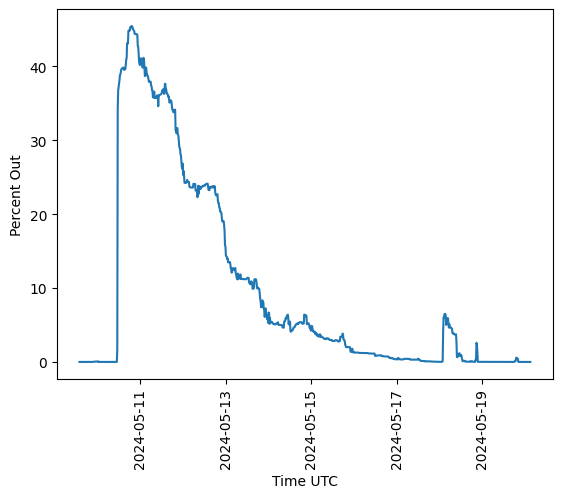

In [21]:
# Plot the data 
# Leon County Figure

from matplotlib import pyplot as plt
fig, ax = plt.subplots()

plt.xticks(rotation=90);
plt.plot(xnewpt1, ynewLeon, '-')

# Adding labels
plt.xlabel('Time UTC')
plt.ylabel('Percent Out')

# Display the plot
plt.show()

In [112]:
# Walton County
# use the to_datetime function and the apply function to covert the date and time into a single representative integer
df_Walton['time'] = df_Walton['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)

df_Walton

/var/folders/6j/v_2lhj5d2bs58zpz0n5k72t40000gp/T/ipykernel_6835/2430758957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Walton['time'] = df_Walton['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)


,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data,time
142125,Walton,FL,12131,modeled,1,71263,0,05/09/2024 10:00 AM UTC,False,1715248800000000000
142126,Walton,FL,12131,modeled,1,71263,0,05/09/2024 10:15 AM UTC,False,1715249700000000000
142127,Walton,FL,12131,modeled,1,71263,0,05/09/2024 10:30 AM UTC,False,1715250600000000000
142128,Walton,FL,12131,modeled,1,71263,0,05/09/2024 10:45 AM UTC,False,1715251500000000000
142129,Walton,FL,12131,modeled,1,71263,0,05/09/2024 11:00 AM UTC,False,1715252400000000000
...,...,...,...,...,...,...,...,...,...,...
142852,Walton,FL,12131,modeled,5,71263,0.01,05/20/2024 06:15 AM UTC,False,1716185700000000000
142853,Walton,FL,12131,modeled,5,71263,0.01,05/20/2024 06:30 AM UTC,False,1716186600000000000
142854,Walton,FL,12131,modeled,5,71263,0.01,05/20/2024 06:45 AM UTC,False,1716187500000000000
142855,Walton,FL,12131,modeled,5,71263,0.01,05/20/2024 07:00 AM UTC,False,1716188400000000000


In [117]:
pd.to_datetime(1715248800000000000)

Timestamp('2024-05-09 10:00:00')

In [120]:
import numpy as np
Time_Walton_array = df_Taylor['time'].to_numpy()
Percent_Out_Walton_array = df_Walton['Percent Out'].to_numpy()

In [122]:
min_length = min(len(Time_Walton_array), len(Percent_Out_Walton_array))
Time_Walton_array = Time_Walton_array[:min_length]
Percent_Out_Walton_array = Percent_Out_Walton_array[:min_length]

In [123]:
f_Walton_time_interpolate = interpolate.interp1d(Time_Walton_array, Time_Walton_array)
f_Walton_time_Percent_Out_interpolate = interpolate.interp1d(Time_Walton_array, Percent_Out_Walton_array)

In [124]:
new_w=np.arange( 1715248800000000000, 1716189300000000000, 900000000000)
len(new_w)

1045

In [125]:
xnewpt9 = pd.to_datetime(new_w)
xnewWalton = f_Walton_time_interpolate(new_w)
ynewWalton = f_Walton_time_Percent_Out_interpolate(new_w)

ValueError: A value (1.7152488e+18) in x_new is below the interpolation range's minimum value (1715262300000000000).

In [22]:
# Talor County
# use the to_datetime function and the apply function to covert the date and time into a single representative integer
df_Taylor['time'] = df_Taylor['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)

df_Taylor

/var/folders/6j/v_2lhj5d2bs58zpz0n5k72t40000gp/T/ipykernel_6835/3956439862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Taylor['time'] = df_Taylor['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)


,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data,time
139957,Taylor,FL,12123,modeled,41,12322,0.33,05/09/2024 01:45 PM UTC,False,1715262300000000000
139958,Taylor,FL,12123,modeled,41,12322,0.33,05/09/2024 02:00 PM UTC,False,1715263200000000000
139959,Taylor,FL,12123,modeled,1,12322,0.01,05/09/2024 03:00 PM UTC,False,1715266800000000000
139960,Taylor,FL,12123,modeled,1,12322,0.01,05/09/2024 03:15 PM UTC,False,1715267700000000000
139961,Taylor,FL,12123,modeled,1,12322,0.01,05/09/2024 03:30 PM UTC,False,1715268600000000000
...,...,...,...,...,...,...,...,...,...,...
140328,Taylor,FL,12123,modeled,1,12322,0.01,05/20/2024 02:15 AM UTC,False,1716171300000000000
140329,Taylor,FL,12123,modeled,1,12322,0.01,05/20/2024 02:30 AM UTC,False,1716172200000000000
140330,Taylor,FL,12123,modeled,1,12322,0.01,05/20/2024 02:45 AM UTC,False,1716173100000000000
140331,Taylor,FL,12123,modeled,1,12322,0.01,05/20/2024 03:00 AM UTC,False,1716174000000000000


In [23]:
pd.to_datetime(1715262300000000000)

Timestamp('2024-05-09 13:45:00')

In [24]:
print("rows, columns of Taylor County dataframe:", df_Taylor.shape)

rows, columns of Taylor County dataframe: (375, 10)


In [25]:
# Step 1.: Convert all the pandas dataframes for time and sum of outages to numpy arrays. 
# time_Taylor_array is the timestamp array for Taylor County
# sum_Taylor_array is the sum of customers without power for that timestamp for Taylor County

import numpy as np
Time_Taylor_array = df_Taylor['time'].to_numpy()
Percent_Out_Taylor_array = df_Taylor['Percent Out'].to_numpy()

In [26]:
# Step 2: make a group of functions that follow the changes in time and number of outages between each data point in each series. 
# For example, if the time interval between the first and second data points in the Pima county data series is 30 minutes rather
# than 15 min, like it is in the LA County series, these functions below
# help us follow that so we will be able to up sample the Pima series for 15 minute intervals.


f_Taylor_time_interpolate = interpolate.interp1d(Time_Taylor_array, Time_Taylor_array)
f_Taylor_time_Percent_Out_interpolate = interpolate.interp1d(Time_Taylor_array, Percent_Out_Taylor_array)

In [27]:
# Step 3a: Find the time increment

# We want a time frequency that captures the best available detail in the data. 

# If you go up and look at the run_start_time data for LA country, you will notice that most data points are 15 minutes apart. 
# a 15 minute increment corresponds to 900000000000 in our timestamp. 

# Find the time increment in the LA data by subtracting the first time from the second timestamp data.
test = 1715262300000000000 - 1715263200000000000
test


-900000000000

In [28]:
# Step 3c: Make an array that has a timestamp for every 15 minutes for the full range of the time data in the day.  
# we cut and past the start time from the first point in the Los Angeles data series. 
# we use the end time and increment that we found in the cells above.


new_t=np.arange( 1715262300000000000, 1716174900000000000, 900000000000)
len(new_t)

1014

In [29]:
# Step 4: use the functions you found in step 2 above and the new_t array from Step 3, t
# o up sample all of the time and sum ( of customers without power) data 
# to the new time frequency of 15 minutes.  

# xnewp = Pima timestamp upsampled to 15 min intervals
# xnewpt = Upsample Pima timestamp data converted back to human readable Month/Day/Hour 
# ynewp Pima "sum" data up sampled to the new 15 min time intervals 
# xnewla = Los Angeles timestamp upsampled to 15 min intervals
# ynewla = Los Angeles "sum" upsampled to 15 min intervals

xnewpt = pd.to_datetime(new_t)
xnewTaylor = f_Taylor_time_interpolate(new_t)
ynewTaylor = f_Taylor_time_Percent_Out_interpolate(new_t)


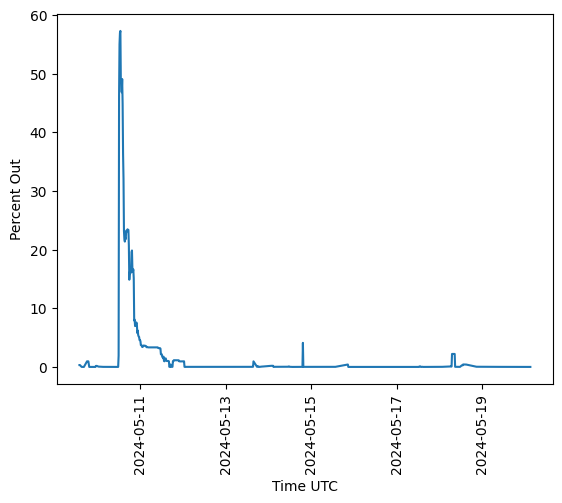

In [30]:
# Plot the data 
# Talor County Figure

from matplotlib import pyplot as plt
fig, ax = plt.subplots()

plt.xticks(rotation=90);
plt.plot(xnewpt, ynewTaylor, '-')

# Adding labels
plt.xlabel('Time UTC')
plt.ylabel('Percent Out')

# Display the plot
plt.show()

In [31]:
# Gadsden County
# use the to_datetime function and the apply function to covert the date and time into a single representative integer
df_Gadsden['time'] = df_Gadsden['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)

df_Gadsden

/var/folders/6j/v_2lhj5d2bs58zpz0n5k72t40000gp/T/ipykernel_6835/1847772944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Gadsden['time'] = df_Gadsden['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)


,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data,time
111752,Gadsden,FL,12039,modeled,1,30169,0,05/09/2024 10:15 AM UTC,False,1715249700000000000
111753,Gadsden,FL,12039,modeled,1,30169,0,05/09/2024 10:30 AM UTC,False,1715250600000000000
111754,Gadsden,FL,12039,modeled,1,30169,0,05/09/2024 10:45 AM UTC,False,1715251500000000000
111755,Gadsden,FL,12039,modeled,1,30169,0,05/09/2024 11:00 AM UTC,False,1715252400000000000
111765,Gadsden,FL,12039,modeled,2,30169,0.01,05/09/2024 01:30 PM UTC,False,1715261400000000000
...,...,...,...,...,...,...,...,...,...,...
112489,Gadsden,FL,12039,modeled,1,30169,0,05/19/2024 11:00 PM UTC,False,1716159600000000000
112490,Gadsden,FL,12039,modeled,1,30169,0,05/19/2024 11:15 PM UTC,False,1716160500000000000
112491,Gadsden,FL,12039,modeled,1,30169,0,05/19/2024 11:30 PM UTC,False,1716161400000000000
112492,Gadsden,FL,12039,modeled,1,30169,0,05/19/2024 11:45 PM UTC,False,1716162300000000000


In [32]:
# Step 1.: Convert all the pandas dataframes for time and sum of outages to numpy arrays. 
# time_Taylor_array is the timestamp array for Taylor County
# sum_Taylor_array is the sum of customers without power for that timestamp for Taylor County

import numpy as np
Time_Gadsden_array = df_Gadsden['time'].to_numpy()
Percent_Out_Gadsden_array = df_Gadsden['Percent Out'].to_numpy()

In [33]:
# Step 2: make a group of functions that follow the changes in time and number of outages between each data point in each series. 
# For example, if the time interval between the first and second data points in the Pima county data series is 30 minutes rather
# than 15 min, like it is in the LA County series, these functions below
# help us follow that so we will be able to up sample the Pima series for 15 minute intervals.


f_Gadsden_time_interpolate = interpolate.interp1d(Time_Gadsden_array, Time_Gadsden_array)
f_Gadsden_time_Percent_Out_interpolate = interpolate.interp1d(Time_Gadsden_array, Percent_Out_Gadsden_array)

In [34]:
# Step 3c: Make an array that has a timestamp for every 15 minutes for the full range of the time data in the day.  
# we cut and past the start time from the first point in the Los Angeles data series. 
# we use the end time and increment that we found in the cells above.


new_g=np.arange( 1715249700000000000, 1716163200000000000, 900000000000)
len(new_g)

1015

In [35]:
# Step 4: use the functions you found in step 2 above and the new_t array from Step 3, t
# o up sample all of the time and sum ( of customers without power) data 
# to the new time frequency of 15 minutes.  

# xnewp = Pima timestamp upsampled to 15 min intervals
# xnewpt = Upsample Pima timestamp data converted back to human readable Month/Day/Hour 
# ynewp Pima "sum" data up sampled to the new 15 min time intervals 
# xnewla = Los Angeles timestamp upsampled to 15 min intervals
# ynewla = Los Angeles "sum" upsampled to 15 min intervals

xnewpt2 = pd.to_datetime(new_g)
xnewGadsden = f_Gadsden_time_interpolate(new_g)
ynewGadsden = f_Gadsden_time_Percent_Out_interpolate(new_g)


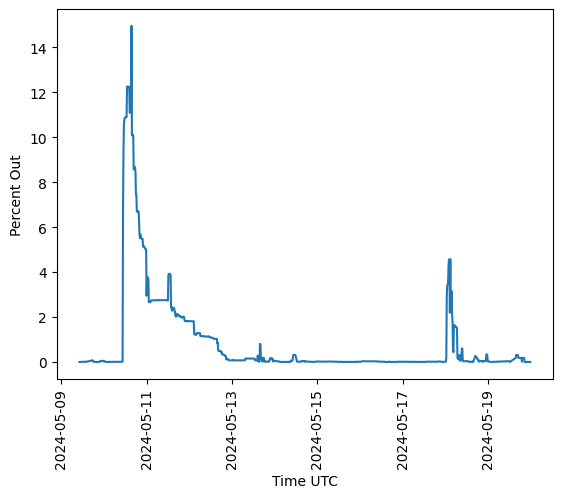

In [36]:
# Plot the data 
# Gadsden County Figure

from matplotlib import pyplot as plt
fig, ax = plt.subplots()

plt.xticks(rotation=90);
plt.plot(xnewpt2, ynewGadsden, '-')

# Adding labels
plt.xlabel('Time UTC')
plt.ylabel('Percent Out')

# Display the plot
plt.show()

In [37]:
# Gadsden County
# use the to_datetime function and the apply function to covert the date and time into a single representative integer
df_Madison['time'] = df_Madison['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)

df_Madison

/var/folders/6j/v_2lhj5d2bs58zpz0n5k72t40000gp/T/ipykernel_6835/2235540326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Madison['time'] = df_Madison['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)


,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data,time
122811,Madison,FL,12079,modeled,12,9624,0.12,05/09/2024 05:45 PM UTC,False,1715276700000000000
122812,Madison,FL,12079,modeled,1,9624,0.01,05/09/2024 08:15 PM UTC,False,1715285700000000000
122813,Madison,FL,12079,modeled,1,9624,0.01,05/09/2024 08:30 PM UTC,False,1715286600000000000
122814,Madison,FL,12079,modeled,52,9624,0.54,05/09/2024 09:15 PM UTC,False,1715289300000000000
122815,Madison,FL,12079,modeled,53,9624,0.55,05/09/2024 09:30 PM UTC,False,1715290200000000000
...,...,...,...,...,...,...,...,...,...,...
123250,Madison,FL,12079,modeled,8,9624,0.08,05/19/2024 12:30 PM UTC,False,1716121800000000000
123251,Madison,FL,12079,modeled,1,9624,0.01,05/19/2024 11:30 PM UTC,False,1716161400000000000
123252,Madison,FL,12079,modeled,1,9624,0.01,05/19/2024 11:45 PM UTC,False,1716162300000000000
123253,Madison,FL,12079,modeled,1,9624,0.01,05/20/2024 12:00 AM UTC,False,1716163200000000000


In [38]:
# Step 1.: Convert all the pandas dataframes for time and sum of outages to numpy arrays. 
# time_Taylor_array is the timestamp array for Taylor County
# sum_Taylor_array is the sum of customers without power for that timestamp for Taylor County

import numpy as np
Time_Madison_array = df_Madison['time'].to_numpy()
Percent_Out_Madison_array = df_Madison['Percent Out'].to_numpy()

In [39]:
# Step 2: make a group of functions that follow the changes in time and number of outages between each data point in each series. 
# For example, if the time interval between the first and second data points in the Pima county data series is 30 minutes rather
# than 15 min, like it is in the LA County series, these functions below
# help us follow that so we will be able to up sample the Pima series for 15 minute intervals.


f_Madison_time_interpolate = interpolate.interp1d(Time_Madison_array, Time_Madison_array)
f_Madison_time_Percent_Out_interpolate = interpolate.interp1d(Time_Madison_array, Percent_Out_Madison_array)

In [40]:
# Step 3c: Make an array that has a timestamp for every 15 minutes for the full range of the time data in the day.  
# we cut and past the start time from the first point in the Los Angeles data series. 
# we use the end time and increment that we found in the cells above.


new_m=np.arange( 1715276700000000000, 1716164100000000000, 900000000000)
len(new_m)

986

In [41]:
# Step 4: use the functions you found in step 2 above and the new_t array from Step 3, t
# o up sample all of the time and sum ( of customers without power) data 
# to the new time frequency of 15 minutes.  

# xnewp = Pima timestamp upsampled to 15 min intervals
# xnewpt = Upsample Pima timestamp data converted back to human readable Month/Day/Hour 
# ynewp Pima "sum" data up sampled to the new 15 min time intervals 
# xnewla = Los Angeles timestamp upsampled to 15 min intervals
# ynewla = Los Angeles "sum" upsampled to 15 min intervals

xnewpt3 = pd.to_datetime(new_m)
xnewMadison = f_Madison_time_interpolate(new_m)
ynewMadison = f_Madison_time_Percent_Out_interpolate(new_m)


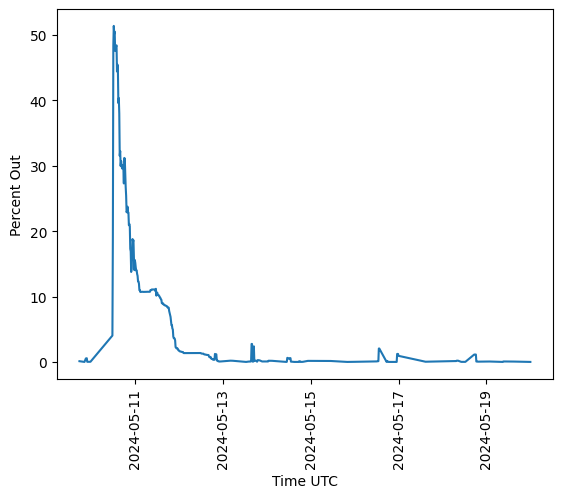

In [42]:
# Plot the data 
# Madison County Figure

from matplotlib import pyplot as plt
fig, ax = plt.subplots()

plt.xticks(rotation=90);
plt.plot(xnewpt3, ynewMadison, '-')

# Adding labels
plt.xlabel('Time UTC')
plt.ylabel('Percent Out')

# Display the plot
plt.show()

In [43]:
# Jefferson County
# use the to_datetime function and the apply function to covert the date and time into a single representative integer
df_Jefferson['time'] = df_Jefferson['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)

df_Jefferson

/var/folders/6j/v_2lhj5d2bs58zpz0n5k72t40000gp/T/ipykernel_6835/1681237390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Jefferson['time'] = df_Jefferson['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)


,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data,time
118136,Jefferson,FL,12065,modeled,77,7443,1.03,05/09/2024 05:45 PM UTC,False,1715276700000000000
118137,Jefferson,FL,12065,modeled,1,7443,0.01,05/09/2024 06:30 PM UTC,False,1715279400000000000
118138,Jefferson,FL,12065,modeled,1,7443,0.01,05/09/2024 06:45 PM UTC,False,1715280300000000000
118139,Jefferson,FL,12065,modeled,11,7443,0.15,05/09/2024 07:00 PM UTC,False,1715281200000000000
118140,Jefferson,FL,12065,modeled,11,7443,0.15,05/09/2024 07:15 PM UTC,False,1715282100000000000
...,...,...,...,...,...,...,...,...,...,...
118688,Jefferson,FL,12065,modeled,3,7443,0.04,05/19/2024 11:15 PM UTC,False,1716160500000000000
118689,Jefferson,FL,12065,modeled,3,7443,0.04,05/19/2024 11:30 PM UTC,False,1716161400000000000
118690,Jefferson,FL,12065,modeled,3,7443,0.04,05/19/2024 11:45 PM UTC,False,1716162300000000000
118691,Jefferson,FL,12065,modeled,3,7443,0.04,05/20/2024 12:00 AM UTC,False,1716163200000000000


In [44]:
# Step 1.: Convert all the pandas dataframes for time and sum of outages to numpy arrays. 
# time_Taylor_array is the timestamp array for Taylor County
# sum_Taylor_array is the sum of customers without power for that timestamp for Taylor County

import numpy as np
Time_Jefferson_array = df_Jefferson['time'].to_numpy()
Percent_Out_Jefferson_array = df_Jefferson['Percent Out'].to_numpy()

In [45]:
# Step 2: make a group of functions that follow the changes in time and number of outages between each data point in each series. 
# For example, if the time interval between the first and second data points in the Pima county data series is 30 minutes rather
# than 15 min, like it is in the LA County series, these functions below
# help us follow that so we will be able to up sample the Pima series for 15 minute intervals.


f_Jefferson_time_interpolate = interpolate.interp1d(Time_Jefferson_array, Time_Jefferson_array)
f_Jefferson_time_Percent_Out_interpolate = interpolate.interp1d(Time_Jefferson_array, Percent_Out_Jefferson_array)

In [46]:
# Step 3c: Make an array that has a timestamp for every 15 minutes for the full range of the time data in the day.  
# we cut and past the start time from the first point in the Los Angeles data series. 
# we use the end time and increment that we found in the cells above.


new_j=np.arange( 1715276700000000000, 1716164100000000000, 900000000000)
len(new_j)

986

In [47]:
# Step 4: use the functions you found in step 2 above and the new_t array from Step 3, t
# o up sample all of the time and sum ( of customers without power) data 
# to the new time frequency of 15 minutes.  

# xnewp = Pima timestamp upsampled to 15 min intervals
# xnewpt = Upsample Pima timestamp data converted back to human readable Month/Day/Hour 
# ynewp Pima "sum" data up sampled to the new 15 min time intervals 
# xnewla = Los Angeles timestamp upsampled to 15 min intervals
# ynewla = Los Angeles "sum" upsampled to 15 min intervals

xnewpt4 = pd.to_datetime(new_j)
xnewJefferson = f_Jefferson_time_interpolate(new_j)
ynewJefferson = f_Jefferson_time_Percent_Out_interpolate(new_j)


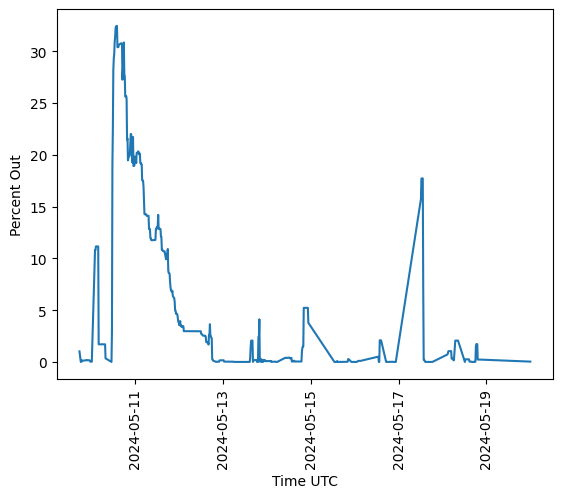

In [48]:
# Plot the data 
# Jefferson County Figure

from matplotlib import pyplot as plt
fig, ax = plt.subplots()

plt.xticks(rotation=90);
plt.plot(xnewpt4, ynewJefferson, '-')

# Adding labels
plt.xlabel('Time UTC')
plt.ylabel('Percent Out')

# Display the plot
plt.show()

In [49]:
# Houston County
# use the to_datetime function and the apply function to covert the date and time into a single representative integer
df_Houston['time'] = df_Houston['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)

df_Houston

/var/folders/6j/v_2lhj5d2bs58zpz0n5k72t40000gp/T/ipykernel_6835/3267635944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Houston['time'] = df_Houston['Run Start Time'].apply(lambda Run_Start_Time : pd.to_datetime(Run_Start_Time).value)


,County,State,Fips Code,Total Customers Type,Customers Out,Total Customers,Percent Out,Run Start Time,Contains Override Data,time
13153,Houston,AL,1069,modeled,1,42273,0,05/09/2024 02:15 PM UTC,False,1715264100000000000
13154,Houston,AL,1069,modeled,1,42273,0,05/09/2024 02:30 PM UTC,False,1715265000000000000
13155,Houston,AL,1069,modeled,1,42273,0,05/09/2024 02:45 PM UTC,False,1715265900000000000
13156,Houston,AL,1069,modeled,1,42273,0,05/09/2024 03:00 PM UTC,False,1715266800000000000
13157,Houston,AL,1069,modeled,1,42273,0,05/09/2024 03:15 PM UTC,False,1715267700000000000
...,...,...,...,...,...,...,...,...,...,...
13690,Houston,AL,1069,modeled,1,42273,0,05/20/2024 06:45 AM UTC,False,1716187500000000000
13691,Houston,AL,1069,modeled,1,42273,0,05/20/2024 07:00 AM UTC,False,1716188400000000000
13692,Houston,AL,1069,modeled,1,42273,0,05/20/2024 07:15 AM UTC,False,1716189300000000000
13693,Houston,AL,1069,modeled,1,42273,0,05/20/2024 07:30 AM UTC,False,1716190200000000000


In [50]:
# Step 1.: Convert all the pandas dataframes for time and sum of outages to numpy arrays. 
# time_Taylor_array is the timestamp array for Taylor County
# sum_Taylor_array is the sum of customers without power for that timestamp for Taylor County

import numpy as np
Time_Houston_array = df_Houston['time'].to_numpy()
Percent_Out_Houston_array = df_Houston['Percent Out'].to_numpy()

In [51]:
# Step 2: make a group of functions that follow the changes in time and number of outages between each data point in each series. 
# For example, if the time interval between the first and second data points in the Pima county data series is 30 minutes rather
# than 15 min, like it is in the LA County series, these functions below
# help us follow that so we will be able to up sample the Pima series for 15 minute intervals.


f_Houston_time_interpolate = interpolate.interp1d(Time_Houston_array, Time_Houston_array)
f_Houston_time_Percent_Out_interpolate = interpolate.interp1d(Time_Houston_array, Percent_Out_Houston_array)

In [52]:
# Step 3c: Make an array that has a timestamp for every 15 minutes for the full range of the time data in the day.  
# we cut and past the start time from the first point in the Los Angeles data series. 
# we use the end time and increment that we found in the cells above.


new_h=np.arange( 1715264100000000000, 1716191100000000000, 900000000000)
len(new_h)

1030

In [53]:
# Step 4: use the functions you found in step 2 above and the new_t array from Step 3, t
# o up sample all of the time and sum ( of customers without power) data 
# to the new time frequency of 15 minutes.  

# xnewp = Pima timestamp upsampled to 15 min intervals
# xnewpt = Upsample Pima timestamp data converted back to human readable Month/Day/Hour 
# ynewp Pima "sum" data up sampled to the new 15 min time intervals 
# xnewla = Los Angeles timestamp upsampled to 15 min intervals
# ynewla = Los Angeles "sum" upsampled to 15 min intervals

xnewpt5 = pd.to_datetime(new_h)
xnewHouston = f_Houston_time_interpolate(new_h)
ynewHouston = f_Houston_time_Percent_Out_interpolate(new_h)


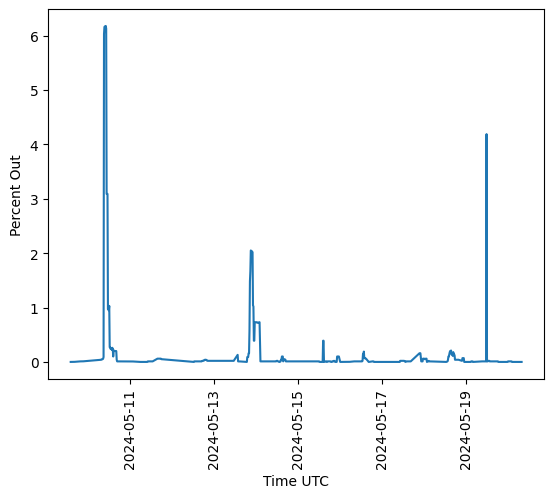

In [54]:
# Plot the data 
# Houston County Figure

from matplotlib import pyplot as plt
fig, ax = plt.subplots()

plt.xticks(rotation=90);
plt.plot(xnewpt5, ynewHouston, '-')

# Adding labels
plt.xlabel('Time UTC')
plt.ylabel('Percent Out')

# Display the plot
plt.show()


In [55]:
import pandas as pd
# create a variable to hold the excel file name
census_df = pd.read_csv('../power_outages_medically_vulnerable_populations/data/CtyAvDemog2010.csv')

# prints the DataFrame to the screen
census_df

,OBJECTID,STATEFP,COUNTYFP,GEOID,NAME,Lat,Lon,Avg_PercentBlackorAfricanAmericanalone,Avg_PercentAmericanIndian_AlaskaNative,Avg_PercentAsian,...,Avg_UnemploymentPct,Avg_PercentOfIndividualsBelow200PctFederalPovertyLinePctile,Avg_PercentOfIndividualsBelow200PctFederalPovertyLine,Avg_PercentOfIndividualsLt10oPctFederalPovertyLinePctile,Avg_PercentOfIndividualsLt100PctFederalPovertyLine,Avg_PercentIndividualsAge25OrOverWithLessThanHighSchoolDegreePct,Avg_PercentIndividualsAge25OrOverWithLessThanHighSchoolDegree,Avg_PercentOfResidentsWhoAreNotCurrentlyEnrolledInHigherEd,Avg_UnemploymentPctIn2009IslandAnd2010StatesAndPR,Avg_PercentageHouseholdsBelow100PctOfFederalPovertyLineIn2009Isl
0,1,31,39,31039,Cuming,41.915865,-96.788517,0.000000,0.000000,0.000000,...,2.333333,43.666667,27.000000,29.000000,6.666667,49.000000,10.333333,95.333333,1.333333,11.333333
1,2,53,69,53069,Wahkiakum,46.294638,-123.424458,0.010000,0.000000,0.010000,...,7.000000,39.000000,25.000000,30.000000,7.000000,40.000000,7.000000,96.000000,7.000000,12.000000
2,3,35,11,35011,De Baca,34.359273,-104.368696,0.010000,0.000000,0.000000,...,10.000000,81.000000,50.000000,64.000000,16.000000,70.000000,15.000000,96.000000,0.000000,21.000000
3,4,31,109,31109,Lancaster,40.783547,-96.688658,0.040811,0.005000,0.040541,...,2.816901,45.732394,31.112676,46.774648,13.929577,30.729730,6.662162,84.608108,4.041667,15.876712
4,5,31,129,31129,Nuckolls,40.176492,-98.046842,0.000000,0.000000,0.015000,...,1.000000,60.000000,35.500000,45.500000,10.500000,39.500000,7.500000,96.500000,2.500000,17.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,3229,13,123,13123,Gilmer,34.690506,-84.454624,0.004000,0.008000,0.002000,...,3.800000,61.400000,36.600000,62.200000,15.800000,73.400000,17.200000,96.400000,6.000000,16.400000
3229,3230,27,135,27135,Roseau,48.761068,-95.821504,0.010000,0.010000,0.018000,...,2.200000,38.600000,24.600000,34.200000,7.800000,34.400000,6.400000,96.400000,3.000000,9.600000
3230,3231,28,89,28089,Madison,32.634370,-90.034160,0.394762,0.000476,0.026667,...,4.857143,38.714286,26.476190,34.666667,9.761905,38.428571,9.000000,91.238095,4.619048,13.857143
3231,3232,48,227,48227,Howard,32.303471,-101.438772,0.045000,0.008000,0.002000,...,6.500000,59.800000,37.700000,59.600000,18.100000,73.600000,19.100000,95.400000,5.700000,17.700000


In [56]:
pip install geopandas matplotlib seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [57]:
# getting a publicly available geopandas geodataframe
# we need this so we have the borders for the US counties
uscounties_polygons_gdf = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
uscounties_polygons_gdf["id"] = uscounties_polygons_gdf["id"].astype(str).astype(np.int64)
uscounties_polygons_gdf = uscounties_polygons_gdf.rename(columns={"id":"FIPS_Code"})
uscounties_polygons_gdf

,FIPS_Code,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.7179 32.4028..."
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.5778 33.76532, -86.75914 33.8406..."
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87052, -85.12342 32.772..."
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.5817, -88.13925 34.5878..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.2251 37.23487, -81.20477 37.2430..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.9683 37.5378, -81.92787 37.51212..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.0794, -78.49303 36.8912..."


In [58]:
census_df

,OBJECTID,STATEFP,COUNTYFP,GEOID,NAME,Lat,Lon,Avg_PercentBlackorAfricanAmericanalone,Avg_PercentAmericanIndian_AlaskaNative,Avg_PercentAsian,...,Avg_UnemploymentPct,Avg_PercentOfIndividualsBelow200PctFederalPovertyLinePctile,Avg_PercentOfIndividualsBelow200PctFederalPovertyLine,Avg_PercentOfIndividualsLt10oPctFederalPovertyLinePctile,Avg_PercentOfIndividualsLt100PctFederalPovertyLine,Avg_PercentIndividualsAge25OrOverWithLessThanHighSchoolDegreePct,Avg_PercentIndividualsAge25OrOverWithLessThanHighSchoolDegree,Avg_PercentOfResidentsWhoAreNotCurrentlyEnrolledInHigherEd,Avg_UnemploymentPctIn2009IslandAnd2010StatesAndPR,Avg_PercentageHouseholdsBelow100PctOfFederalPovertyLineIn2009Isl
0,1,31,39,31039,Cuming,41.915865,-96.788517,0.000000,0.000000,0.000000,...,2.333333,43.666667,27.000000,29.000000,6.666667,49.000000,10.333333,95.333333,1.333333,11.333333
1,2,53,69,53069,Wahkiakum,46.294638,-123.424458,0.010000,0.000000,0.010000,...,7.000000,39.000000,25.000000,30.000000,7.000000,40.000000,7.000000,96.000000,7.000000,12.000000
2,3,35,11,35011,De Baca,34.359273,-104.368696,0.010000,0.000000,0.000000,...,10.000000,81.000000,50.000000,64.000000,16.000000,70.000000,15.000000,96.000000,0.000000,21.000000
3,4,31,109,31109,Lancaster,40.783547,-96.688658,0.040811,0.005000,0.040541,...,2.816901,45.732394,31.112676,46.774648,13.929577,30.729730,6.662162,84.608108,4.041667,15.876712
4,5,31,129,31129,Nuckolls,40.176492,-98.046842,0.000000,0.000000,0.015000,...,1.000000,60.000000,35.500000,45.500000,10.500000,39.500000,7.500000,96.500000,2.500000,17.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,3229,13,123,13123,Gilmer,34.690506,-84.454624,0.004000,0.008000,0.002000,...,3.800000,61.400000,36.600000,62.200000,15.800000,73.400000,17.200000,96.400000,6.000000,16.400000
3229,3230,27,135,27135,Roseau,48.761068,-95.821504,0.010000,0.010000,0.018000,...,2.200000,38.600000,24.600000,34.200000,7.800000,34.400000,6.400000,96.400000,3.000000,9.600000
3230,3231,28,89,28089,Madison,32.634370,-90.034160,0.394762,0.000476,0.026667,...,4.857143,38.714286,26.476190,34.666667,9.761905,38.428571,9.000000,91.238095,4.619048,13.857143
3231,3232,48,227,48227,Howard,32.303471,-101.438772,0.045000,0.008000,0.002000,...,6.500000,59.800000,37.700000,59.600000,18.100000,73.600000,19.100000,95.400000,5.700000,17.700000


In [59]:
df_CS = census_df.loc[(census_df["NAME"]== 'Gadsden') | (census_df["NAME"]== 'Leon') | (census_df["NAME"]== 'Walton') | (census_df["NAME"]== 'Madison') | (census_df["NAME"]== 'Houston') | (census_df["NAME"]== 'Taylor') | (census_df["NAME"]== 'Jefferson')]
df_CS

,OBJECTID,STATEFP,COUNTYFP,GEOID,NAME,Lat,Lon,Avg_PercentBlackorAfricanAmericanalone,Avg_PercentAmericanIndian_AlaskaNative,Avg_PercentAsian,...,Avg_UnemploymentPct,Avg_PercentOfIndividualsBelow200PctFederalPovertyLinePctile,Avg_PercentOfIndividualsBelow200PctFederalPovertyLine,Avg_PercentOfIndividualsLt10oPctFederalPovertyLinePctile,Avg_PercentOfIndividualsLt100PctFederalPovertyLine,Avg_PercentIndividualsAge25OrOverWithLessThanHighSchoolDegreePct,Avg_PercentIndividualsAge25OrOverWithLessThanHighSchoolDegree,Avg_PercentOfResidentsWhoAreNotCurrentlyEnrolledInHigherEd,Avg_UnemploymentPctIn2009IslandAnd2010StatesAndPR,Avg_PercentageHouseholdsBelow100PctOfFederalPovertyLineIn2009Isl
62,63,16,51,16051,Jefferson,43.796965,-112.318588,0.000000,0.007500,0.005000,...,3.500000,59.000000,35.250000,30.000000,6.750000,51.750000,10.250000,92.250000,3.750000,9.000000
73,74,12,131,12131,Walton,30.631211,-86.176614,0.043636,0.005455,0.007273,...,5.090909,55.090909,34.181818,56.272727,14.454545,53.818182,12.363636,94.909091,6.272727,14.090909
163,164,29,123,29123,Madison,37.474481,-90.343413,0.003333,0.000000,0.003333,...,3.000000,69.333333,41.000000,54.333333,13.000000,70.333333,15.333333,94.666667,5.333333,19.000000
197,198,48,245,48245,Jefferson,29.854000,-94.149331,0.369306,0.001528,0.035556,...,5.434783,62.028986,40.449275,61.202899,19.188406,64.291667,17.666667,93.777778,6.826087,18.985507
234,235,16,65,16065,Madison,43.788614,-111.656993,0.001667,0.000000,0.010000,...,6.666667,79.333333,55.000000,73.666667,30.666667,23.166667,4.666667,64.333333,3.333333,32.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,3118,12,73,12073,Leon,30.459310,-84.277800,0.329706,0.000882,0.026324,...,7.485294,56.279412,39.970588,58.617647,22.514706,33.250000,7.044118,76.455882,6.161765,23.044776
3159,3160,27,55,27055,Houston,43.666990,-91.501556,0.008000,0.000000,0.000000,...,1.600000,33.600000,22.200000,34.400000,8.000000,24.400000,4.800000,95.800000,4.000000,9.200000
3171,3172,48,441,48441,Taylor,32.297327,-99.890179,0.085135,0.004865,0.013784,...,3.108108,63.243243,40.972973,58.972973,17.540541,51.540541,12.378378,89.000000,2.756757,18.388889
3191,3192,30,57,30057,Madison,45.325289,-111.913791,0.000000,0.000000,0.000000,...,2.000000,49.333333,30.000000,35.000000,7.666667,21.333333,4.000000,97.000000,4.666667,11.333333


In [60]:
df_CS_1 = df_CS.loc[(df_CS["STATEFP"]== 0o1) | (df_CS["STATEFP"]== 12)]

df_CS_1

,OBJECTID,STATEFP,COUNTYFP,GEOID,NAME,Lat,Lon,Avg_PercentBlackorAfricanAmericanalone,Avg_PercentAmericanIndian_AlaskaNative,Avg_PercentAsian,...,Avg_UnemploymentPct,Avg_PercentOfIndividualsBelow200PctFederalPovertyLinePctile,Avg_PercentOfIndividualsBelow200PctFederalPovertyLine,Avg_PercentOfIndividualsLt10oPctFederalPovertyLinePctile,Avg_PercentOfIndividualsLt100PctFederalPovertyLine,Avg_PercentIndividualsAge25OrOverWithLessThanHighSchoolDegreePct,Avg_PercentIndividualsAge25OrOverWithLessThanHighSchoolDegree,Avg_PercentOfResidentsWhoAreNotCurrentlyEnrolledInHigherEd,Avg_UnemploymentPctIn2009IslandAnd2010StatesAndPR,Avg_PercentageHouseholdsBelow100PctOfFederalPovertyLineIn2009Isl
73,74,12,131,12131,Walton,30.631211,-86.176614,0.043636,0.005455,0.007273,...,5.090909,55.090909,34.181818,56.272727,14.454545,53.818182,12.363636,94.909091,6.272727,14.090909
1799,1800,12,65,12065,Jefferson,30.424558,-83.890859,0.326667,0.000000,0.000000,...,5.666667,63.666667,37.666667,63.666667,16.000000,70.666667,16.333333,96.000000,5.000000,17.666667
2061,2062,1,69,1069,Houston,31.158183,-85.296411,0.327273,0.000000,0.003636,...,7.227273,67.636364,43.909091,67.954545,21.363636,65.318182,15.818182,93.727273,5.318182,18.954545
2123,2124,1,89,1089,Madison,34.764238,-86.551080,0.283288,0.002603,0.018904,...,5.232877,46.972603,32.424658,47.547945,15.315068,41.835616,9.753425,89.369863,6.178082,13.643836
2341,2342,12,123,12123,Taylor,30.009908,-83.609482,0.175000,0.000000,0.007500,...,5.000000,70.250000,42.250000,73.000000,20.000000,73.000000,18.000000,95.250000,10.000000,17.750000
2386,2387,12,79,12079,Madison,30.447232,-83.470416,0.338000,0.002000,0.006000,...,4.400000,75.000000,47.400000,83.000000,27.000000,68.600000,16.400000,95.200000,6.800000,20.200000
2980,2981,1,73,1073,Jefferson,33.553444,-86.896536,0.489448,0.000982,0.009877,...,7.257669,58.184049,38.717791,58.472393,18.552147,48.368098,10.877301,91.773006,7.435583,17.263804
2983,2984,12,39,12039,Gadsden,30.578687,-84.612607,0.554444,0.000000,0.000000,...,7.111111,71.555556,45.555556,71.666667,22.222222,77.777778,19.555556,93.777778,8.111111,26.444444
3117,3118,12,73,12073,Leon,30.459310,-84.277800,0.329706,0.000882,0.026324,...,7.485294,56.279412,39.970588,58.617647,22.514706,33.250000,7.044118,76.455882,6.161765,23.044776


In [61]:
# Select FIPS Code for all affected counties only
df_FIPS = uscounties_polygons_gdf.loc[(uscounties_polygons_gdf["FIPS_Code"]== 1069) | (uscounties_polygons_gdf["FIPS_Code"]== 12131) | (uscounties_polygons_gdf["FIPS_Code"]== 12123) |
(uscounties_polygons_gdf["FIPS_Code"]== 12065) | (uscounties_polygons_gdf["FIPS_Code"]== 12079) | (uscounties_polygons_gdf["FIPS_Code"]== 12039) | (uscounties_polygons_gdf["FIPS_Code"]== 12073)]

# prints the DataFrame to the screen
df_FIPS

,FIPS_Code,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
69,12039,0500000US12039,12,039,Gadsden,County,516.332,"POLYGON ((-84.86469 30.71154, -84.86346 30.711..."
72,12073,0500000US12073,12,073,Leon,County,666.852,"POLYGON ((-84.03971 30.67382, -84.00745 30.672..."
777,12131,0500000US12131,12,131,Walton,County,1037.625,"POLYGON ((-85.99274 30.38932, -85.99471 30.311..."
798,12079,0500000US12079,12,079,Madison,County,695.948,"POLYGON ((-83.30946 30.63442, -83.30925 30.634..."
2102,1069,0500000US01069,01,069,Houston,County,579.824,"POLYGON ((-85.00237 31.00068, -85.02411 31.000..."
2364,12123,0500000US12123,12,123,Taylor,County,1043.305,"POLYGON ((-83.85699 30.27332, -83.82946 30.287..."
2546,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-84.00739 30.6721, -83.88032 30.6658..."


In [62]:
# All of them combined
import numpy as np
new_l=np.arange( 1715262300000000000, 1716174900000000000, 900000000000)
len(new_l)

1014

In [63]:
Time_Leon_array = df_Leon['time'].to_numpy()
Percent_Out_Leon_array = df_Leon['Percent Out'].to_numpy()

In [100]:
import pandas as pd



In [133]:

xnewpt1 = pd.to_datetime(new_l)
xnewpt2 = pd.to_datetime(new_g)
xnewLeon = f_Leon_time_interpolate(new_g)
ynewLeon = f_Leon_time_Percent_Out_interpolate(new_g)
xnewGadsden = f_Gadsden_time_interpolate(new_g)
ynewGadsden = f_Gadsden_time_Percent_Out_interpolate(new_g)
xnewAlachua = f_Alachua_time_interpolate(new_g)
ynewAlachua = f_Alachua_time_Percent_Out_interpolate(new_g)

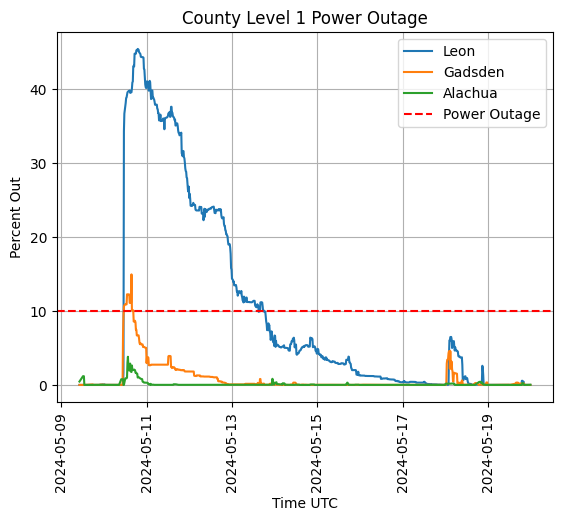

In [135]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

# Rotate x-ticks
plt.xticks(rotation=90)

# Plot your data
plt.plot(xnewpt2, ynewLeon, '-', label='Leon')
plt.plot(xnewpt2, ynewGadsden, label='Gadsden')
plt.plot(xnewpt2, ynewAlachua, label='Alachua')

# Adding a horizontal line at y=0 (through the x-axis)
plt.axhline(y=10, color='r', linestyle='--', label='Power Outage')

# Adding labels
plt.xlabel('Time UTC')
plt.ylabel('Percent Out')

# Adding a title
plt.title('County Level 1 Power Outage')

# Adding a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [107]:
xnewpt3 = pd.to_datetime(new_m)
xnewMadison = f_Madison_time_interpolate(new_m)
ynewMadison = f_Madison_time_Percent_Out_interpolate(new_m)
xnewJefferson = f_Jefferson_time_interpolate(new_m)
ynewJefferson = f_Jefferson_time_Percent_Out_interpolate(new_m)
xnewHouston = f_Houston_time_interpolate(new_m)
ynewHouston = f_Houston_time_Percent_Out_interpolate(new_m)
xnewTaylor = f_Taylor_time_interpolate(new_m)
ynewTaylor = f_Taylor_time_Percent_Out_interpolate(new_m)

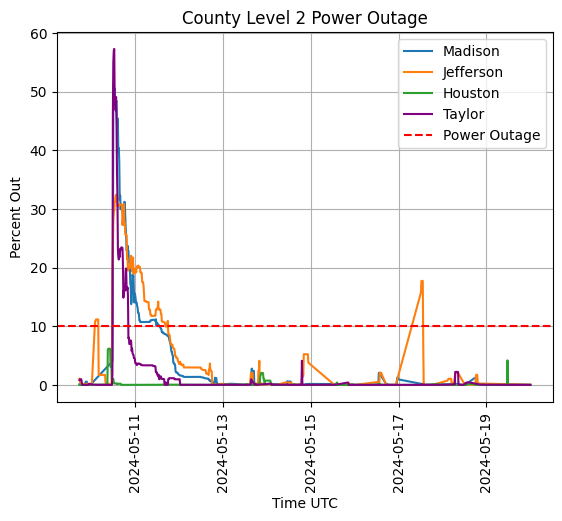

In [136]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

# Rotate x-ticks
plt.xticks(rotation=90)

# Plot your data
plt.plot(xnewpt3, ynewMadison, '-', label='Madison')
plt.plot(xnewpt3, ynewJefferson, label='Jefferson')
plt.plot(xnewpt3, ynewHouston, '-', label='Houston')
plt.plot(xnewpt3, ynewTaylor, color='purple', label='Taylor')

# Adding a horizontal line at y=0 (through the x-axis)
plt.axhline(y=10, color='r', linestyle='--', label='Power Outage')

# Adding labels
plt.xlabel('Time UTC')
plt.ylabel('Percent Out')

# Adding a title
plt.title('County Level 2 Power Outage')

# Adding a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()